# Balancing: Discord Spam Detector

### Tamara Frances
<br>

---
<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [3]:
df = pd.read_excel('../data/data-for-capstone.xlsx')
df.columns = df.columns.str.lower()
df = df.rename(columns={'spam?':'spam'})

<br>

---

<br>

In [3]:
X = df['text']
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, random_state=42)

In [4]:
y.value_counts(normalize=True)

N    0.87963
Y    0.12037
Name: spam, dtype: float64

<br>
<br>

---

<br>
<br>

In [5]:
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

<br>

### Balancing with Logistic Regression

lr_imb best params :  {'randomoversampler__sampling_strategy': 1}
Classification Report:
              precision    recall  f1-score   support

           N       0.94      0.99      0.97       143
           Y       0.91      0.53      0.67        19

    accuracy                           0.94       162
   macro avg       0.92      0.76      0.82       162
weighted avg       0.94      0.94      0.93       162



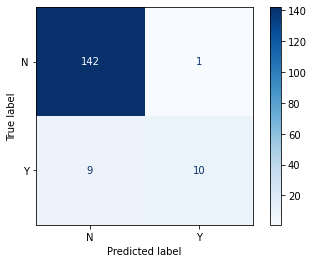

In [6]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

lr_pipe = make_pipeline(RandomOverSampler(random_state=42), LogisticRegression(max_iter=10_000))
lr_imb = GridSearchCV(lr_pipe, {'randomoversampler__sampling_strategy': [.25, .5, .75, 1]}, n_jobs=-1)
lr_imb.fit(X_train_cv, y_train)

print('lr_imb best params : ', lr_imb.best_params_)

lr_cr = classification_report(y_test, lr_imb.predict(X_test_cv))
print("Classification Report:")
print(lr_cr)

ConfusionMatrixDisplay.from_estimator(lr_imb, X_test_cv, y_test, cmap='Blues');

<br>

### Balancing with Random Forest Classifier

rfc_imb best params :  {'randomoversampler__sampling_strategy': 1}
Classification Report:
              precision    recall  f1-score   support

           N       0.94      0.98      0.96       143
           Y       0.77      0.53      0.62        19

    accuracy                           0.93       162
   macro avg       0.85      0.75      0.79       162
weighted avg       0.92      0.93      0.92       162



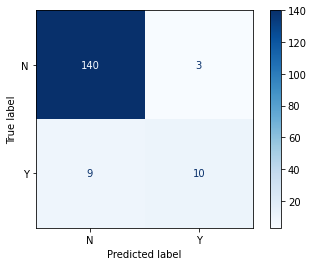

In [7]:
rfc_pipe = make_pipeline(RandomOverSampler(random_state=42), RandomForestClassifier(random_state=42))
rfc_imb = GridSearchCV(rfc_pipe, {'randomoversampler__sampling_strategy': [.25, .5, .75, 1]}, n_jobs=-1)
rfc_imb.fit(X_train_cv, y_train)

print('rfc_imb best params : ', rfc_imb.best_params_)

rfc_cr = classification_report(y_test, rfc_imb.predict(X_test_cv))
print("Classification Report:")
print(rfc_cr)

ConfusionMatrixDisplay.from_estimator(rfc_imb, X_test_cv, y_test, cmap='Blues');

<br>

### Balancing with Multinomial Naive Bayes

mnb_imb best params :  {'randomoversampler__sampling_strategy': 0.75}
Classification Report:
              precision    recall  f1-score   support

           N       0.97      0.92      0.94       143
           Y       0.56      0.79      0.65        19

    accuracy                           0.90       162
   macro avg       0.76      0.85      0.80       162
weighted avg       0.92      0.90      0.91       162



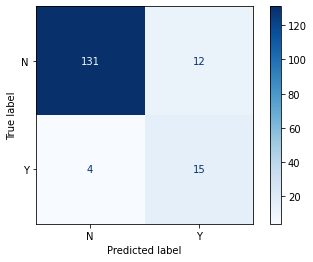

In [8]:
mnb_pipe = make_pipeline(RandomOverSampler(random_state=42), MultinomialNB())
mnb_imb = GridSearchCV(mnb_pipe, {'randomoversampler__sampling_strategy': [.25, .5, .75, 1]}, n_jobs=-1)
mnb_imb.fit(X_train_cv, y_train)

print('mnb_imb best params : ', mnb_imb.best_params_)

mnb_cr = classification_report(y_test, mnb_imb.predict(X_test_cv))
print("Classification Report:")
print(mnb_cr)

ConfusionMatrixDisplay.from_estimator(mnb_imb, X_test_cv, y_test, cmap='Blues');